In [298]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [299]:
df_original = pd.read_csv(
    "./data/abalone_train.csv",
    names=[
        "length",
        "diameter",
        "height",
        "whole_weight",
        "shucked_weight",
        "viscera_weight",
        "shell_weight",
        "age",
    ],
)

df = df_original.copy()

df.sample(n=10)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
1233,0.625,0.520,0.175,1.4105,0.6910,0.3220,0.3465,10
842,0.465,0.345,0.105,0.4015,0.2420,0.0345,0.1090,6
1620,0.510,0.415,0.140,0.8185,0.3025,0.2155,0.2350,16
1884,0.625,0.515,0.180,1.3485,0.5255,0.2520,0.3925,14
2558,0.640,0.485,0.145,1.1335,0.5525,0.2505,0.3015,11
1409,0.585,0.435,0.140,0.6955,0.3085,0.1290,0.2245,8
899,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.5500,22
3275,0.485,0.395,0.140,0.6295,0.2285,0.1270,0.2250,14
2961,0.520,0.410,0.120,0.5950,0.2385,0.1110,0.1900,8
2883,0.590,0.460,0.140,1.0040,0.4960,0.2165,0.2600,9


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          3320 non-null   float64
 1   diameter        3320 non-null   float64
 2   height          3320 non-null   float64
 3   whole_weight    3320 non-null   float64
 4   shucked_weight  3320 non-null   float64
 5   viscera_weight  3320 non-null   float64
 6   shell_weight    3320 non-null   float64
 7   age             3320 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 207.6 KB


In [301]:
df.describe().round(3)

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,3320.000,3320.000,3320.000,3320.000,3320.000,3320.000,3320.000,3320.000
mean,0.523,0.407,0.139,0.825,0.358,0.180,0.238,9.897
std,0.121,0.100,0.043,0.491,0.222,0.110,0.140,3.206
min,0.075,0.055,0.000,0.002,0.001,0.000,0.002,1.000
25%,0.450,0.345,0.115,0.436,0.182,0.092,0.127,8.000
50%,0.540,0.425,0.140,0.795,0.336,0.171,0.230,9.000
75%,0.615,0.480,0.165,1.150,0.504,0.253,0.325,11.000
max,0.815,0.650,1.130,2.826,1.488,0.760,1.005,27.000


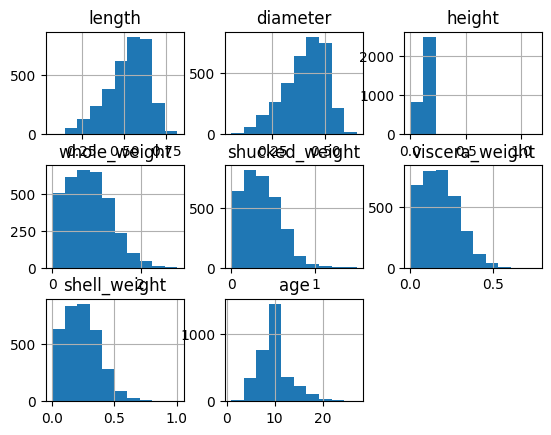

In [302]:
df.hist()
plt.show()

In [303]:
for label, content in df.items():
    print(f'Unique values in "{label}": {len(content.unique())}')

Unique values in "length": 132
Unique values in "diameter": 110
Unique values in "height": 51
Unique values in "whole_weight": 2145
Unique values in "shucked_weight": 1409
Unique values in "viscera_weight": 845
Unique values in "shell_weight": 855
Unique values in "age": 26


In [304]:
X = np.array(df.drop("age", axis=1))
y = np.array(df["age"])

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train

array([[0.64  , 0.505 , 0.175 , ..., 0.6185, 0.302 , 0.3315],
       [0.485 , 0.36  , 0.12  , ..., 0.2465, 0.1025, 0.147 ],
       [0.61  , 0.5   , 0.18  , ..., 0.5185, 0.3735, 0.3345],
       ...,
       [0.535 , 0.43  , 0.14  , ..., 0.2855, 0.1595, 0.2155],
       [0.585 , 0.46  , 0.165 , ..., 0.486 , 0.25  , 0.294 ],
       [0.54  , 0.415 , 0.11  , ..., 0.2755, 0.15  , 0.1765]])

In [306]:
print("--------------------------------------------------")
print(f"Input Shape: {X_train.shape}")
print("--------------------------------------------------")

--------------------------------------------------
Input Shape: (2490, 7)
--------------------------------------------------


In [307]:
normalization_layer = tf.keras.layers.Normalization()

normalization_layer.adapt(X_train)

In [308]:
model = tf.keras.Sequential(
    [
        normalization_layer,
        tf.keras.layers.Input(7),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1),
    ]
)

In [309]:
loss_function = tf.keras.losses.MeanSquaredError()

In [310]:
optimizer_function = tf.keras.optimizers.Adam()

In [311]:
model.compile(loss=loss_function, optimizer=optimizer_function)

In [312]:
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
78/78 [==============================] - 1s 1ms/step - loss: 98.3759
Epoch 2/8
78/78 [==============================] - 0s 1ms/step - loss: 73.1491
Epoch 3/8
78/78 [==============================] - 0s 1ms/step - loss: 38.5106
Epoch 4/8
78/78 [==============================] - 0s 1ms/step - loss: 13.7866
Epoch 5/8
78/78 [==============================] - 0s 1ms/step - loss: 6.1103
Epoch 6/8
78/78 [==============================] - 0s 1ms/step - loss: 5.1714
Epoch 7/8
78/78 [==============================] - 0s 1ms/step - loss: 5.1326
Epoch 8/8
78/78 [==============================] - 0s 1ms/step - loss: 5.0806


In [313]:
loss = model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 1ms/step - loss: 4.8754
